## Import Libraries

In [16]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Import Dataset

In [17]:
df = pd.read_excel("CCD.xls", header=1, verbose=True)
df.head()

Reading sheet 0


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Data Preprocessing

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

### Inspect Data Statistics

In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


### Check for missing data

In [20]:
print(df.isnull().sum())
print(f"Number of NaN in dataset: {df.isnull().sum().sum()}")

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64
Number of NaN in dataset: 0


### Set types for each data column.
`PAY_X` variables are left as integers.

In [21]:
df["LIMIT_BAL"] = df["LIMIT_BAL"].astype('float')
df["SEX"] = df["SEX"].astype('category')
df["EDUCATION"] = df["EDUCATION"].astype('category')
df["MARRIAGE"] = df["MARRIAGE"].astype('category')
df["AGE"] = df["AGE"].astype('float')
df["BILL_AMT1"] = df["BILL_AMT1"].astype('float')
df["BILL_AMT2"] = df["BILL_AMT2"].astype('float')
df["BILL_AMT3"] = df["BILL_AMT3"].astype('float')
df["BILL_AMT4"] = df["BILL_AMT4"].astype('float')
df["BILL_AMT5"] = df["BILL_AMT5"].astype('float')
df["BILL_AMT6"] = df["BILL_AMT6"].astype('float')
df["PAY_AMT1"] = df["PAY_AMT1"].astype('float')
df["PAY_AMT2"] = df["PAY_AMT2"].astype('float')
df["PAY_AMT3"] = df["PAY_AMT3"].astype('float')
df["PAY_AMT4"] = df["PAY_AMT4"].astype('float')
df["PAY_AMT5"] = df["PAY_AMT5"].astype('float')
df["PAY_AMT6"] = df["PAY_AMT6"].astype('float')

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000.0,2,2,1,24.0,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26.0,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34.0,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37.0,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57.0,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   LIMIT_BAL                   30000 non-null  float64 
 1   SEX                         30000 non-null  category
 2   EDUCATION                   30000 non-null  category
 3   MARRIAGE                    30000 non-null  category
 4   AGE                         30000 non-null  float64 
 5   PAY_0                       30000 non-null  int64   
 6   PAY_2                       30000 non-null  int64   
 7   PAY_3                       30000 non-null  int64   
 8   PAY_4                       30000 non-null  int64   
 9   PAY_5                       30000 non-null  int64   
 10  PAY_6                       30000 non-null  int64   
 11  BILL_AMT1                   30000 non-null  float64 
 12  BILL_AMT2                   30000 non-null  float64 
 13  BILL_AMT3       

In [23]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0
PAY_6,30000.0,-0.291100,1.149988,-2.0,-1.00,0.0,0.00,8.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0


### Split into features and target variable

In [24]:
x = df.iloc[:, :-1]
y = df.iloc[:,len(df.columns)-1]

### Feature Scaling

In [25]:
def scale_data(df_col):
    df_col -= df_col.mean()
    df_col /= df_col.std()
    return df_col

x['LIMIT_BAL'] = scale_data(x['LIMIT_BAL'])
x['AGE'] = scale_data(x['AGE'])
x['BILL_AMT1'] = scale_data(x['BILL_AMT1'])
x['BILL_AMT2'] = scale_data(x['BILL_AMT2'])
x['BILL_AMT3'] = scale_data(x['BILL_AMT3'])
x['BILL_AMT4'] = scale_data(x['BILL_AMT4'])
x['BILL_AMT5'] = scale_data(x['BILL_AMT5'])
x['BILL_AMT6'] = scale_data(x['BILL_AMT6'])
x['PAY_AMT1'] = scale_data(x['PAY_AMT1'])
x['PAY_AMT2'] = scale_data(x['PAY_AMT2'])
x['PAY_AMT3'] = scale_data(x['PAY_AMT3'])
x['PAY_AMT4'] = scale_data(x['PAY_AMT4'])
x['PAY_AMT5'] = scale_data(x['PAY_AMT5'])
x['PAY_AMT6'] = scale_data(x['PAY_AMT6'])


x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136701,2,2,1,-1.245999,2,2,-1,-1,-2,...,-0.667982,-0.672486,-0.663047,-0.652713,-0.341936,-0.227082,-0.296796,-0.308057,-0.314131,-0.293377
1,-0.365974,2,2,2,-1.029030,-1,2,0,0,0,...,-0.639244,-0.621626,-0.606219,-0.597956,-0.341936,-0.213584,-0.240001,-0.244226,-0.314131,-0.180875
2,-0.597192,2,2,2,-0.161154,0,0,0,0,0,...,-0.482400,-0.449723,-0.417181,-0.391623,-0.250287,-0.191884,-0.240001,-0.244226,-0.248679,-0.012122
3,-0.905483,2,2,1,0.164300,0,0,0,0,0,...,0.032846,-0.232369,-0.186726,-0.156576,-0.221187,-0.169358,-0.228641,-0.237842,-0.244162,-0.237126
4,-0.905483,1,2,1,2.333990,-1,0,-1,0,0,...,-0.161186,-0.346991,-0.348131,-0.331476,-0.221187,1.335012,0.271161,0.266429,-0.269034,-0.255183


### One-hot Encoding of categorical variables
In this case `EDUCATION`, `SEX` and `MARRIAGE`

In [26]:
x = pd.get_dummies(x)
x.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,-1.136701,-1.245999,2,2,-1,-1,-2,-2,-0.642490,-0.647388,...,False,True,False,False,False,False,False,True,False,False
1,-0.365974,-1.029030,-1,2,0,0,0,2,-0.659208,-0.666735,...,False,True,False,False,False,False,False,False,True,False
2,-0.597192,-0.161154,0,0,0,0,0,0,-0.298555,-0.493891,...,False,True,False,False,False,False,False,False,True,False
3,-0.905483,0.164300,0,0,0,0,0,0,-0.057490,-0.013292,...,False,True,False,False,False,False,False,True,False,False
4,-0.905483,2.333990,-1,0,-1,0,0,0,-0.578608,-0.611308,...,False,True,False,False,False,False,False,True,False,False


In [27]:
x = x.to_numpy().astype('float32')
y = y.to_numpy().astype('float32')

### Split data and balance classes.

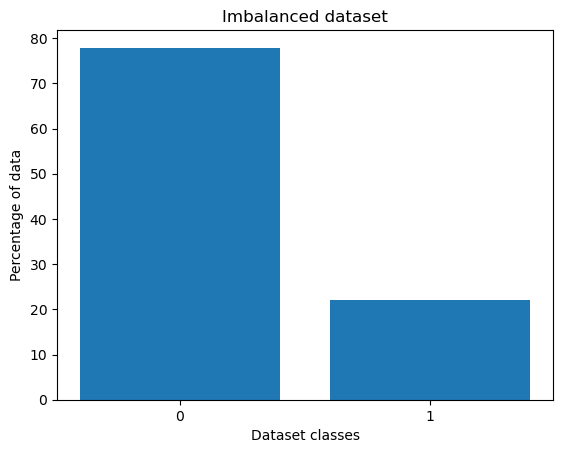

x_train.shape: (37382, 33)
y_train.shape: (37382,)
x_test.shape: (6000, 33)
y_test.shape: (6000,)


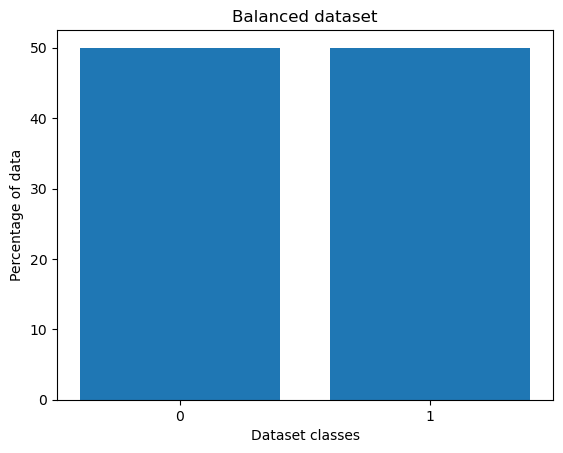

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, stratify=y)

# Before class balancing
ones = np.count_nonzero(y_train) * 100 / y_train.shape[0]
zeros = 100 - ones 
plt.bar(["0", "1"], [zeros, ones])
plt.xlabel("Dataset classes")
plt.ylabel("Percentage of data")
plt.title("Imbalanced dataset")
plt.show()

# Oversample minority class and undersample majority class
over = RandomOverSampler(sampling_strategy='minority')
under = RandomUnderSampler(sampling_strategy='majority')
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Fit only to the training data
x_train, y_train = pipeline.fit_resample(x_train, y_train)

print(f"x_train.shape: {x_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"x_test.shape: {x_test.shape}")
print(f"y_test.shape: {y_test.shape}")

# After class balancing
ones = np.count_nonzero(y_train) * 100 / y_train.shape[0]
zeros = 100 - ones 
plt.bar(["0", "1"], [zeros, ones])
plt.xlabel("Dataset classes")
plt.ylabel("Percentage of data")
plt.title("Balanced dataset")
plt.show()

## Model 1 Development

### Hyperparameters

In [29]:
NB_EPOCHS = 100
BATCH_SIZE = 64
VERBOSE = 1
N_HIDDEN = 66
N_OUTPUT = 1
LOSS = 'binary_crossentropy'
OPTIMISER = "adam"
VALIDATION_SPLIT = 0.2

### Model

In [30]:
model = Sequential()
model.add(Dense(66, input_shape=(33,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
sgd = SGD(learning_rate=0.0001)
adam = Adam(learning_rate=0.0001)
model.compile(loss=LOSS, metrics=['acc'], optimizer=OPTIMISER)
history = model.fit(x_train, y_train, epochs=NB_EPOCHS, batch_size=BATCH_SIZE, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

Epoch 1/100
468/468 [==============================] - 2s 4ms/step - loss: 0.5774 - acc: 0.7227 - val_loss: 0.8390 - val_acc: 0.4586
Epoch 2/100
468/468 [==============================] - 2s 4ms/step - loss: 0.5446 - acc: 0.7448 - val_loss: 0.8260 - val_acc: 0.4743
Epoch 3/100
468/468 [==============================] - 2s 4ms/step - loss: 0.5380 - acc: 0.7476 - val_loss: 0.8126 - val_acc: 0.4767
Epoch 4/100
468/468 [==============================] - 2s 3ms/step - loss: 0.5347 - acc: 0.7472 - val_loss: 0.7696 - val_acc: 0.5260
Epoch 5/100
468/468 [==============================] - 1s 3ms/step - loss: 0.5319 - acc: 0.7481 - val_loss: 0.7870 - val_acc: 0.5161
Epoch 6/100
468/468 [==============================] - 2s 4ms/step - loss: 0.5298 - acc: 0.7488 - val_loss: 0.7227 - val_acc: 0.5489
Epoch 7/100
468/468 [==============================] - 2s 3ms/step - loss: 0.5277 - acc: 0.7504 - val_loss: 0.7693 - val_acc: 0.5348
Epoch 8/100
468/468 [==============================] - 2s 4ms/step - 

### Plot accuracy and loss graphs

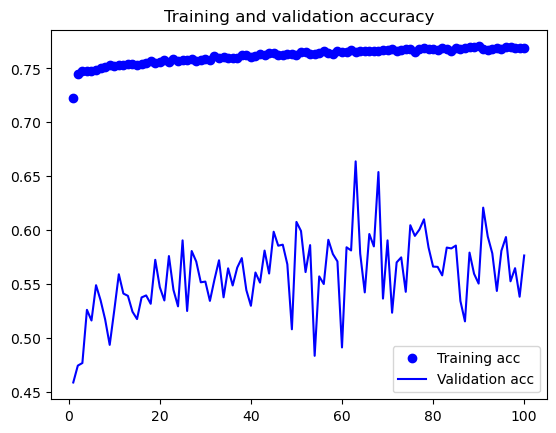

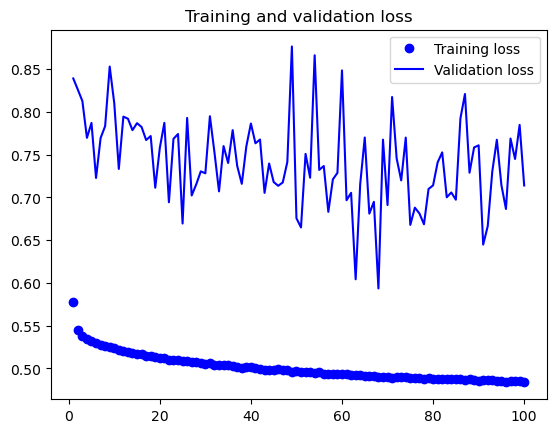

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Display Confusion Matrix

188/188 [==============================] - 0s 1ms/step


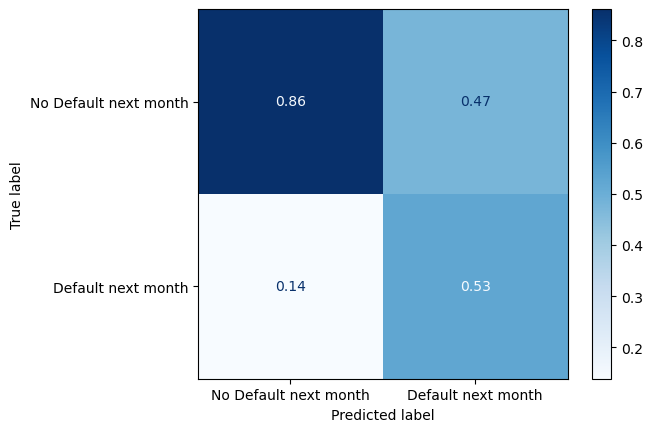

In [32]:
predictions = np.where(model.predict(x_test) > 0.5, 1, 0)
result = confusion_matrix(y_test, predictions, normalize='pred')
disp = ConfusionMatrixDisplay(confusion_matrix=result, display_labels=["No Default next month","Default next month"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Model 2 Development

### Hyperparameters

In [33]:
NB_EPOCHS = 500
BATCH_SIZE = 256
VERBOSE = 1
N_HIDDEN = 66
N_HIDDEN_2 = 128
N_OUTPUT = 1
LOSS = 'binary_crossentropy'
OPTIMISER = RMSprop()
VALIDATION_SPLIT = 0.2
DROPOUT = 0.2

### Model

In [34]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(33,), activation='relu'))
model.add(Dense(N_HIDDEN_2, activation='relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN_2, activation='relu')) 
model.add(Dropout(DROPOUT))
model.add(Dense(N_OUTPUT, activation='sigmoid'))
model.compile(loss=LOSS, optimizer=OPTIMISER, metrics=['acc'])
history = model.fit(x_train, y_train, epochs=NB_EPOCHS, batch_size=BATCH_SIZE, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

Epoch 1/500
117/117 [==============================] - 1s 8ms/step - loss: 0.5734 - acc: 0.7287 - val_loss: 0.7976 - val_acc: 0.4827
Epoch 2/500
117/117 [==============================] - 1s 7ms/step - loss: 0.5476 - acc: 0.7415 - val_loss: 0.7677 - val_acc: 0.5207
Epoch 3/500
117/117 [==============================] - 1s 6ms/step - loss: 0.5360 - acc: 0.7461 - val_loss: 0.7982 - val_acc: 0.5378
Epoch 4/500
117/117 [==============================] - 1s 6ms/step - loss: 0.5327 - acc: 0.7466 - val_loss: 0.8057 - val_acc: 0.5141
Epoch 5/500
117/117 [==============================] - 1s 8ms/step - loss: 0.5272 - acc: 0.7479 - val_loss: 0.7239 - val_acc: 0.5397
Epoch 6/500
117/117 [==============================] - 1s 8ms/step - loss: 0.5233 - acc: 0.7510 - val_loss: 0.8475 - val_acc: 0.5088
Epoch 7/500
117/117 [==============================] - 1s 9ms/step - loss: 0.5193 - acc: 0.7528 - val_loss: 0.6935 - val_acc: 0.5752
Epoch 8/500
117/117 [==============================] - 1s 8ms/step - 

### Plot Accuracy and Loss graphs

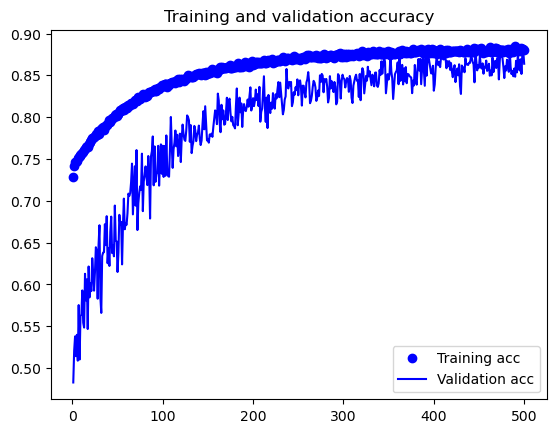

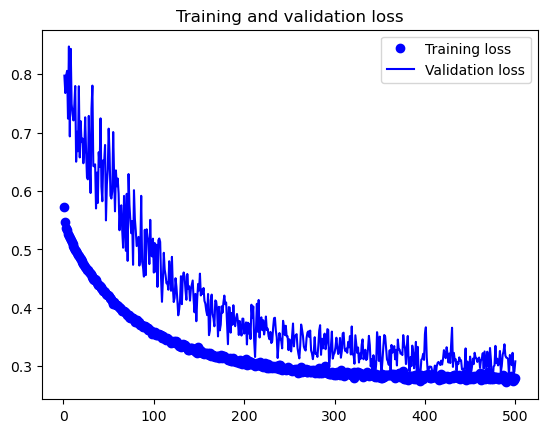

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Display Confusion Matrix

188/188 [==============================] - 1s 3ms/step


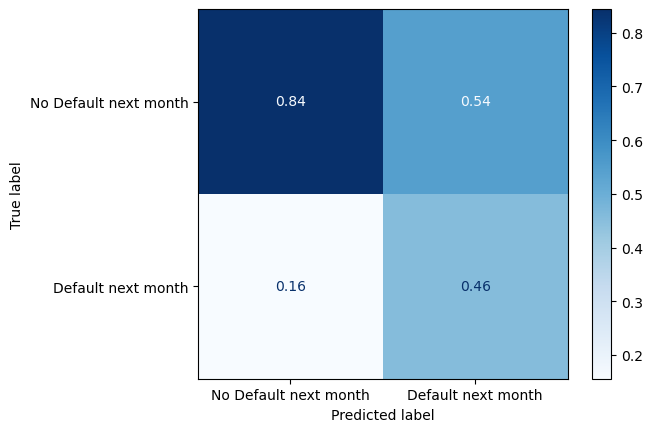

In [36]:
predictions = np.where(model.predict(x_test) > 0.5, 1, 0)
result = confusion_matrix(y_test, predictions, normalize='pred')
disp = ConfusionMatrixDisplay(confusion_matrix=result, display_labels=["No Default next month","Default next month"])
disp.plot(cmap=plt.cm.Blues)
plt.show()